## **프로젝트방법론 팀프로젝트**
#### [2조 파워레인저조]
---

- 데이터셋 : https://dacon.io/competitions/official/235985/data
- 주    제 : 제주도 도로 교통량 예측을 통한 교통체증 개선방안 제시
- 팀    원 : 강혜리, 곽영효, 김지윤, 손병립, 이혜진


> 데이터 로딩 및 전처리

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import gc
import platform


if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

plt.rcParams['font.family'] = 'Malgun Gothic'


In [4]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [8]:
csv_to_parquet('./Data/train.csv', 'train')
csv_to_parquet('./Data/test.csv', 'test')

train Done.
test Done.


In [10]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
info = pd.read_csv('./Data/data_info.csv')
sub = pd.read_csv('./Data/sample_submission.csv')

In [11]:
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   road_in_use            int64  
 5   lane_count             int64  
 6   road_rating            int64  
 7   road_name              object 
 8   multi_linked           int64  
 9   connect_code           int64  
 10  maximum_speed_limit    float64
 11  vehicle_restricted     float64
 12  weight_restricted      float64
 13  height_restricted      float64
 14  road_type              int64  
 15  start_node_name        object 
 16  start_latitude         float64
 17  start_longitude        float64
 18  start_turn_restricted  object 
 19  end_node_name          object 
 20  end_latitude           float64
 21  end_longitude          float64
 22  end_turn_restricte

In [8]:
train.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [9]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [10]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [11]:
train.duplicated().sum()

0

In [12]:
def drop_duplicated(name):
    for col in list(name):
        drop = name.drop_duplicates([col]).shape[0]
        if drop != name.shape[0]:
            print('중복 값이 있는 컬럼명', col)

In [13]:
drop_duplicated(train)

중복 값이 있는 컬럼명 base_date
중복 값이 있는 컬럼명 day_of_week
중복 값이 있는 컬럼명 base_hour
중복 값이 있는 컬럼명 road_in_use
중복 값이 있는 컬럼명 lane_count
중복 값이 있는 컬럼명 road_rating
중복 값이 있는 컬럼명 road_name
중복 값이 있는 컬럼명 multi_linked
중복 값이 있는 컬럼명 connect_code
중복 값이 있는 컬럼명 maximum_speed_limit
중복 값이 있는 컬럼명 vehicle_restricted
중복 값이 있는 컬럼명 weight_restricted
중복 값이 있는 컬럼명 height_restricted
중복 값이 있는 컬럼명 road_type
중복 값이 있는 컬럼명 start_node_name
중복 값이 있는 컬럼명 start_latitude
중복 값이 있는 컬럼명 start_longitude
중복 값이 있는 컬럼명 start_turn_restricted
중복 값이 있는 컬럼명 end_node_name
중복 값이 있는 컬럼명 end_latitude
중복 값이 있는 컬럼명 end_longitude
중복 값이 있는 컬럼명 end_turn_restricted
중복 값이 있는 컬럼명 target


In [14]:
drop_duplicated(test)

중복 값이 있는 컬럼명 base_date
중복 값이 있는 컬럼명 day_of_week
중복 값이 있는 컬럼명 base_hour
중복 값이 있는 컬럼명 road_in_use
중복 값이 있는 컬럼명 lane_count
중복 값이 있는 컬럼명 road_rating
중복 값이 있는 컬럼명 road_name
중복 값이 있는 컬럼명 multi_linked
중복 값이 있는 컬럼명 connect_code
중복 값이 있는 컬럼명 maximum_speed_limit
중복 값이 있는 컬럼명 vehicle_restricted
중복 값이 있는 컬럼명 weight_restricted
중복 값이 있는 컬럼명 height_restricted
중복 값이 있는 컬럼명 road_type
중복 값이 있는 컬럼명 start_node_name
중복 값이 있는 컬럼명 start_latitude
중복 값이 있는 컬럼명 start_longitude
중복 값이 있는 컬럼명 start_turn_restricted
중복 값이 있는 컬럼명 end_node_name
중복 값이 있는 컬럼명 end_latitude
중복 값이 있는 컬럼명 end_longitude
중복 값이 있는 컬럼명 end_turn_restricted


In [15]:
train = train.drop(['id','base_date','road_name', 'start_node_name', 'end_node_name','vehicle_restricted','height_restricted'], axis=1)
test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted','height_restricted'], axis=1)

corr = train.corr()

C:\Users\LG\AppData\Local\Temp\ipykernel_484\2169418472.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
c:\Users\LG\anaconda3\envs\conda3.9\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\LG\anaconda3\envs\conda3.9\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


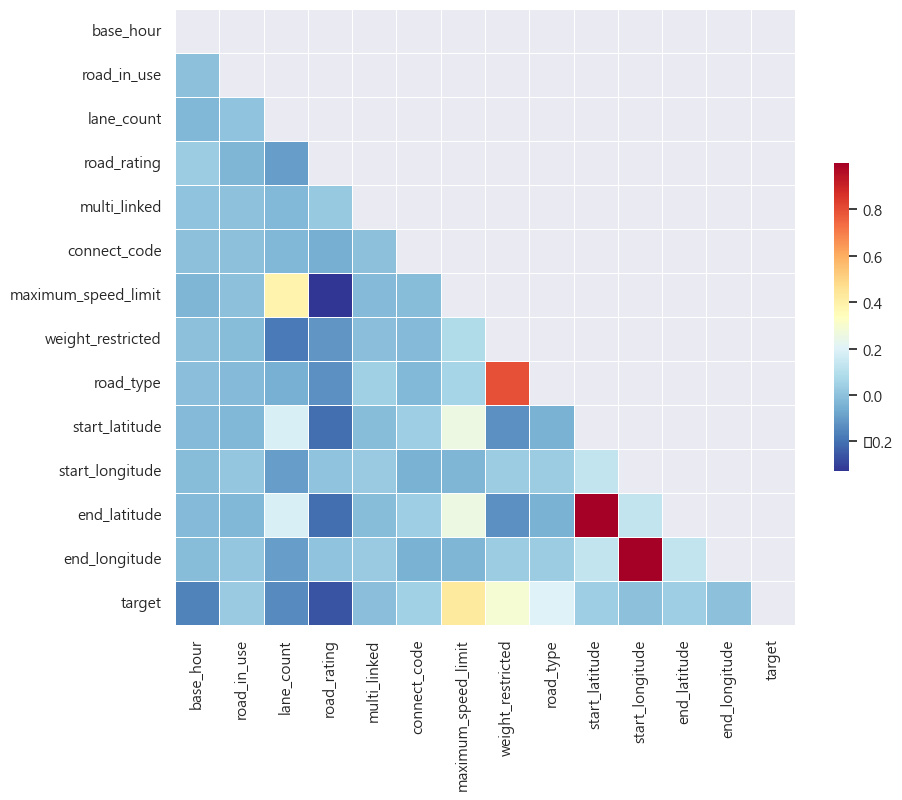

In [16]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            cmap='RdYlBu_r',
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink":.5})
plt.show()

target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.78844180134633
target의 중앙값 : 43.0


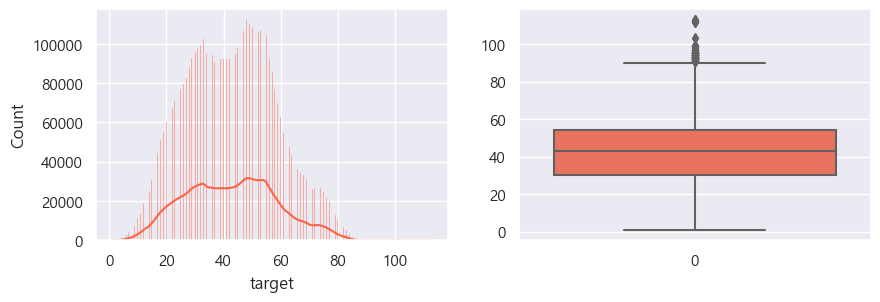

In [17]:
max = train.target.max()
min = train.target.min()
mean = train.target.mean()
median = train.target.median()

print(f'target의 최대값 : {max}')
print(f'target의 최소값 : {min}')
print(f'target의 평균값 : {mean}')
print(f'target의 중앙값 : {median}')

fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
sns.histplot(data=train['target'], kde=True, color ='tomato', ax=ax[0])
sns.boxplot(data=train['target'], color='tomato', ax=ax[1])
plt.show()

In [35]:
print(f'평균속도 80 초과 비율 : {np.around((len(train[train.target > 80]) / len(train)) *100, 3)} %')
print(f'평균속도 10 이하 비율 : {np.around((len(train[train.target <= 10]) / len(train)) *100, 3)} %')

평균속도 80 초과 비율 : 0.558 %
평균속도 10 이하 비율 : 0.697 %


- **20 ~ 80 (최고속도제한)으로 Target (평균속도(km)) 범위 설정**

In [17]:
train_copy = train.copy()

In [18]:
train_copy=train_copy[(train_copy['target']>10) & (train_copy['target']<=80)]

In [19]:
train_target = train_copy['target'] 
train_input = train_copy.drop(['target'], axis=1)
print(train_input.shape)
print(train_target.shape)
print(test.shape)

(4642188, 16)
(4642188,)
(291241, 16)


- 라벨인코딩

In [20]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   day_of_week            int32  
 1   base_hour              int64  
 2   road_in_use            int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   multi_linked           int64  
 6   connect_code           int64  
 7   maximum_speed_limit    float64
 8   weight_restricted      float64
 9   road_type              int64  
 10  start_latitude         float64
 11  start_longitude        float64
 12  start_turn_restricted  int32  
 13  end_latitude           float64
 14  end_longitude          float64
 15  end_turn_restricted    int32  
 16  target                 float64
dtypes: float64(7), int32(3), int64(7)
memory usage: 555.9 MB


In [43]:
train.iloc[:,:-1]

,day_of_week,base_hour,road_in_use,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted
0,1,17,0,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,0,33.427749,126.662335,0
1,1,21,0,2,103,0,0,60.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0
2,4,7,0,2,103,0,0,80.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0
3,0,13,0,2,107,0,0,50.0,0.0,0,33.246081,126.567204,0,33.245565,126.566228,0
4,6,8,0,2,103,0,0,80.0,0.0,0,33.462214,126.326551,0,33.462677,126.330152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,0,1,107,0,0,50.0,0.0,0,33.422145,126.278125,0,33.420955,126.273750,0
4701213,1,2,0,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,0,33.472525,126.424890,0
4701214,3,22,0,2,103,0,0,60.0,0.0,0,33.447183,126.912579,0,33.444121,126.912948,0
4701215,2,2,0,2,103,0,0,80.0,0.0,0,33.443596,126.431817,0,33.444996,126.433332,0


In [44]:
np.save('./train_save', train.iloc[:,:-1])
np.save('./target_save', train.iloc[:,:1])

np.save('./test_save', test)


In [21]:
def value_hist(df, col, target='target'):
  print(df[col].value_counts())
  plt.figure(figsize=(10,3))
  sns.countplot(data=df, x=col, palette='YlGnBu')
  plt.show()
  
  for value in df[col].unique():

    cond = (df[col]==value)
    cond_df = df.loc[cond]

    print(f'{value} 데이터 갯수 : {cond_df.shape[0]}')

    print(f'{col}의 최대값 : {train[col].max()}')
    print(f'{col}의 최소값 : {train[col].min()}')
    print(f'{col}의 평균값 : {train[col].mean()}')
    print(f'{col}의 중앙값 : {train[col].median()}')

    plt.figure(figsize=(10,3))
    sns.histplot(data=cond_df, x='target', kde=True, color='tomato')
    plt.title(f'{col} {value} histogram')
    plt.show()

0    684024
2    675583
1    674070
4    673632
5    669767
6    662498
3    661643
Name: day_of_week, dtype: int64


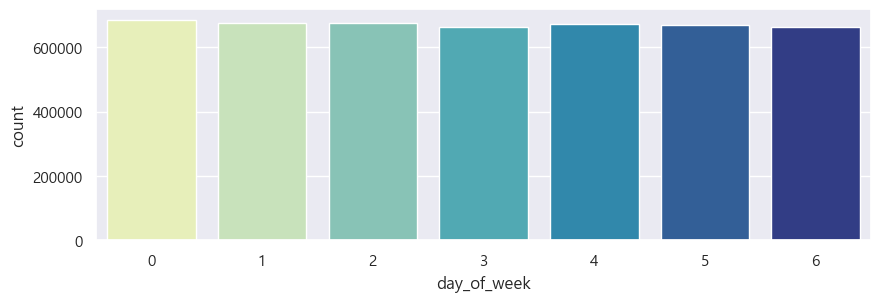

1 데이터 갯수 : 674070
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


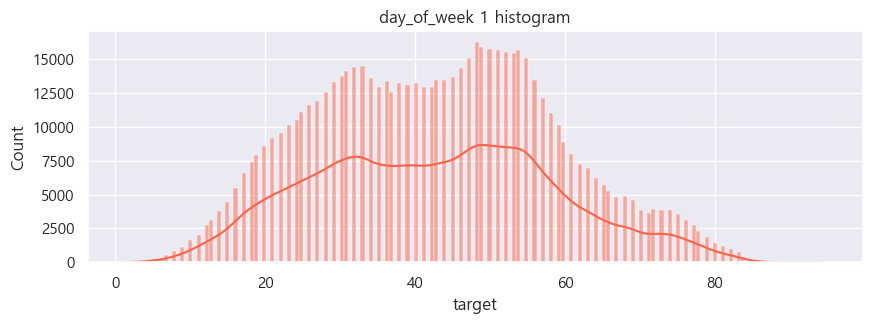

4 데이터 갯수 : 673632
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


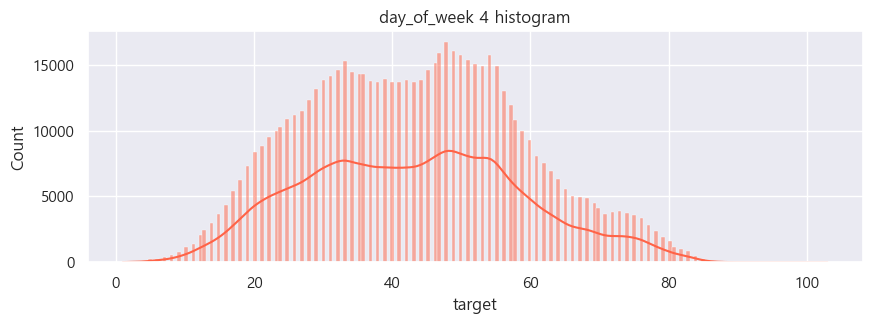

0 데이터 갯수 : 684024
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


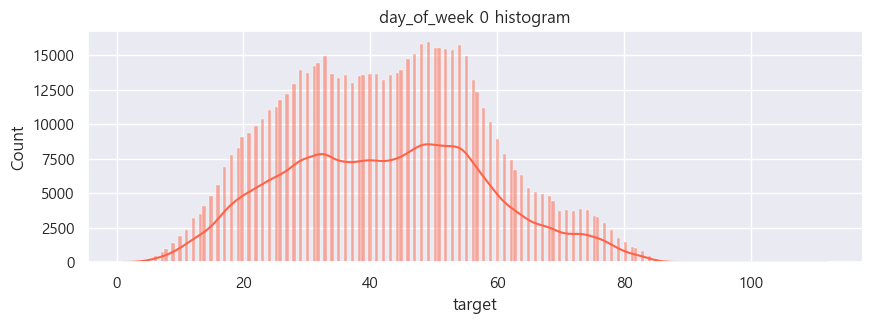

6 데이터 갯수 : 662498
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


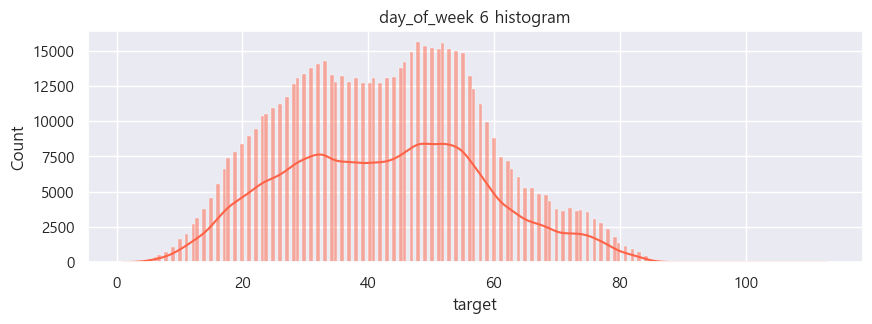

3 데이터 갯수 : 661643
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


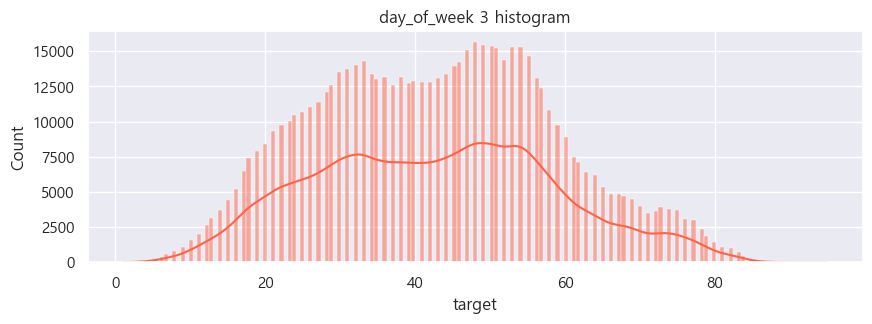

2 데이터 갯수 : 675583
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


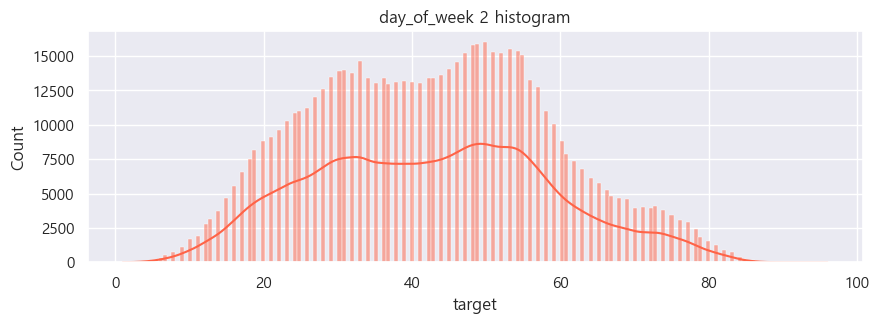

5 데이터 갯수 : 669767
day_of_week의 최대값 : 6
day_of_week의 최소값 : 0
day_of_week의 평균값 : 2.984017968113363
day_of_week의 중앙값 : 3.0


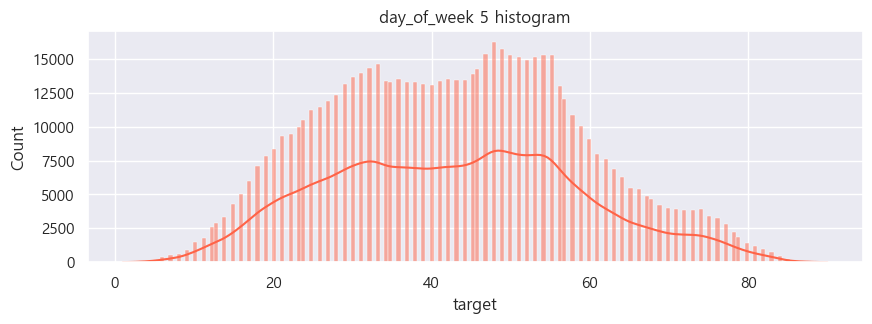

In [22]:
value_hist(train, 'day_of_week')

15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: base_hour, dtype: int64


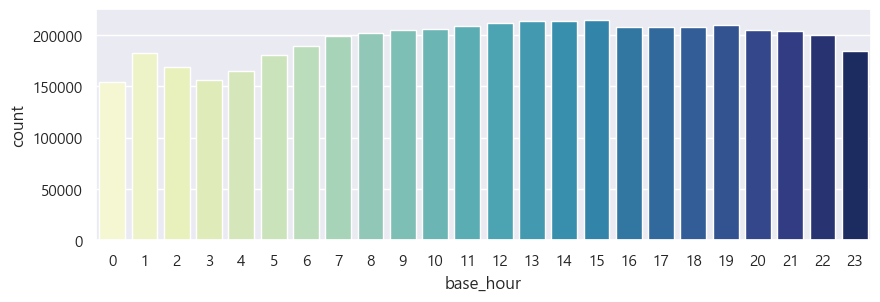

17 데이터 갯수 : 208377
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


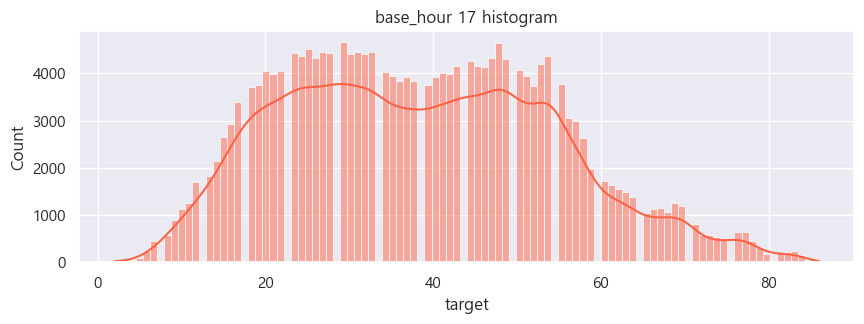

21 데이터 갯수 : 203585
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


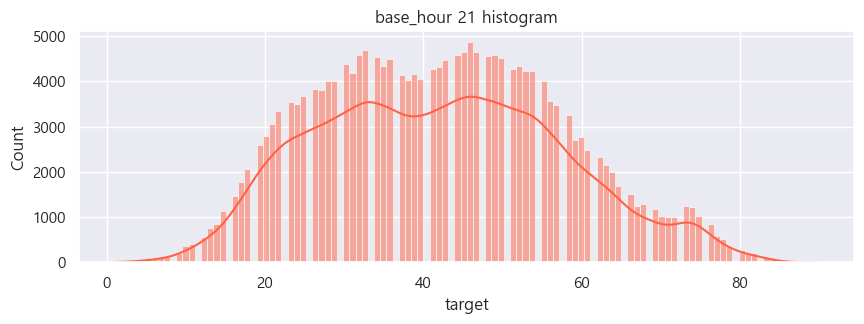

7 데이터 갯수 : 199061
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


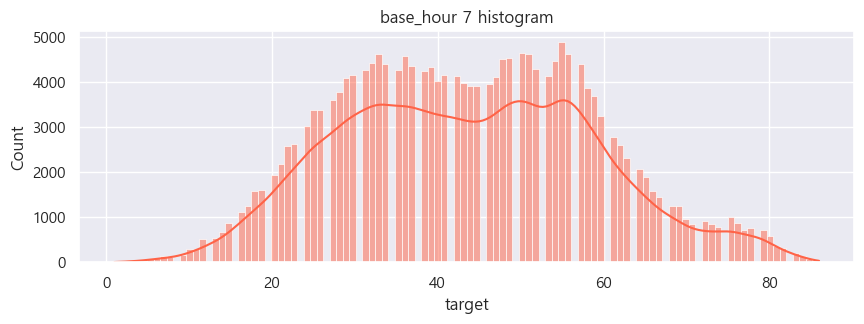

13 데이터 갯수 : 214297
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


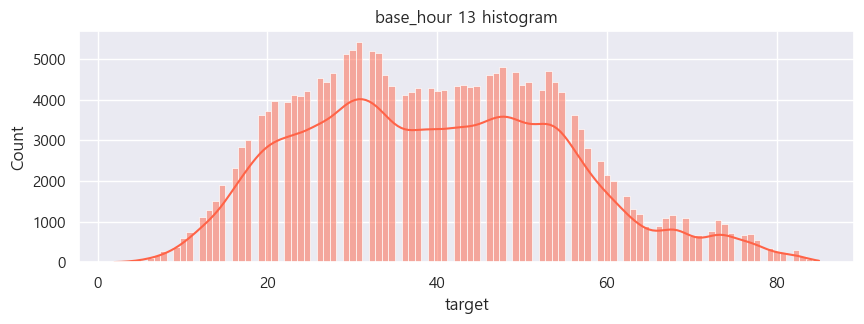

8 데이터 갯수 : 201875
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


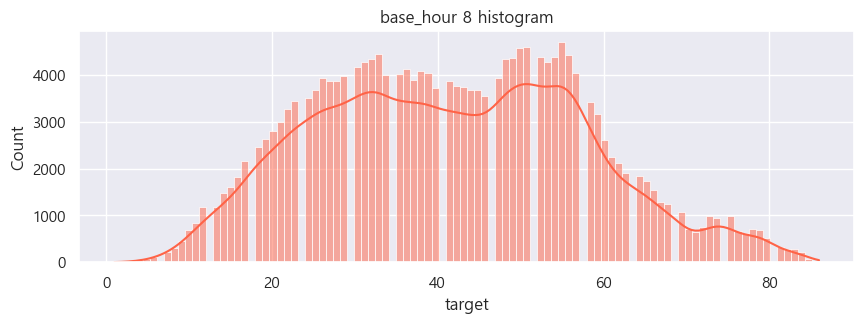

0 데이터 갯수 : 154158
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


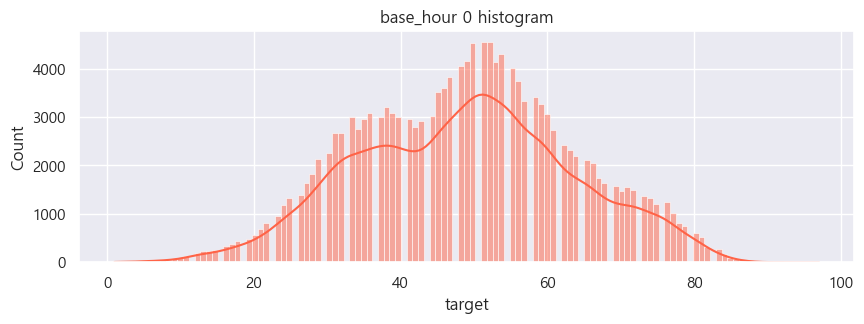

16 데이터 갯수 : 208420
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


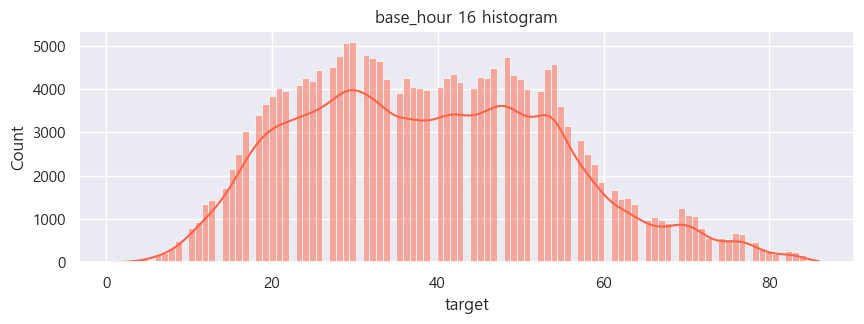

15 데이터 갯수 : 214541
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


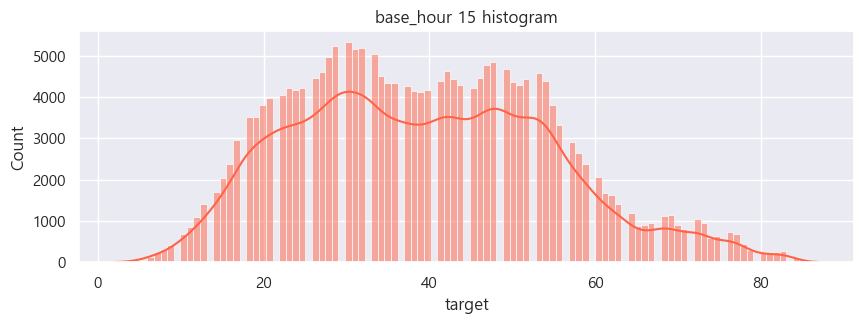

2 데이터 갯수 : 169322
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


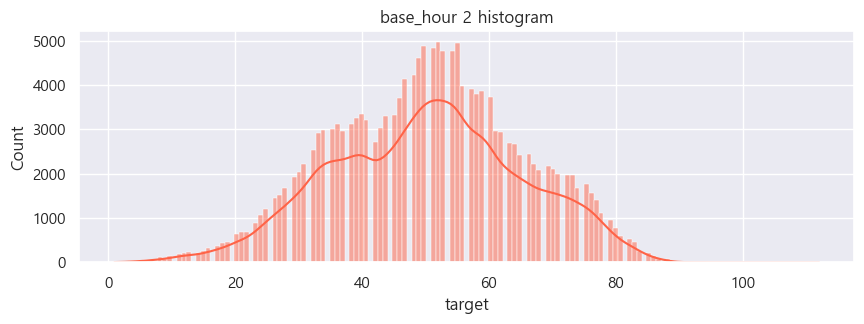

11 데이터 갯수 : 208515
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


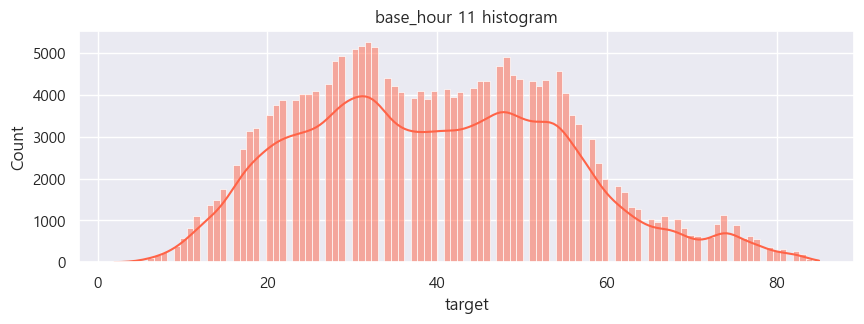

10 데이터 갯수 : 206316
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


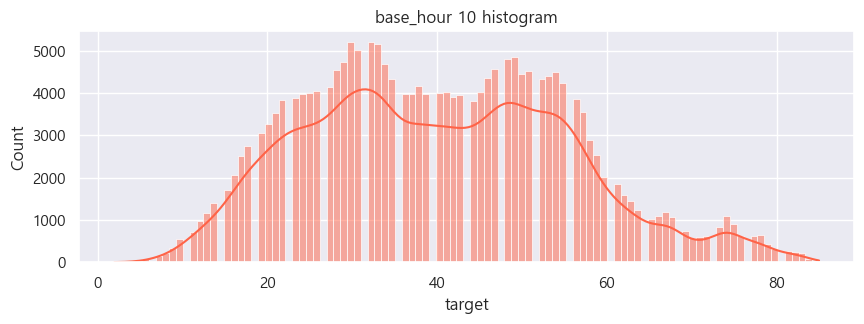

22 데이터 갯수 : 200629
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


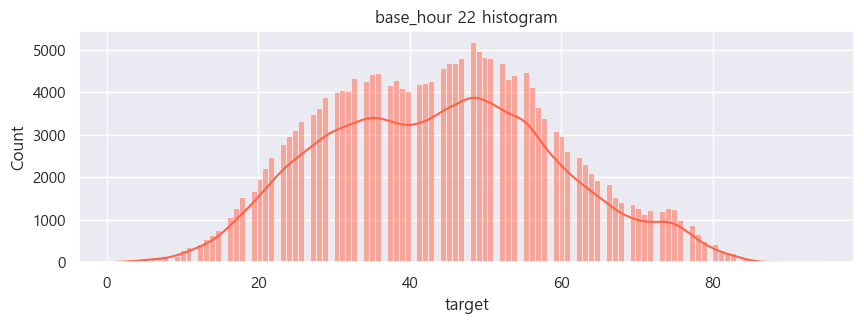

12 데이터 갯수 : 211833
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


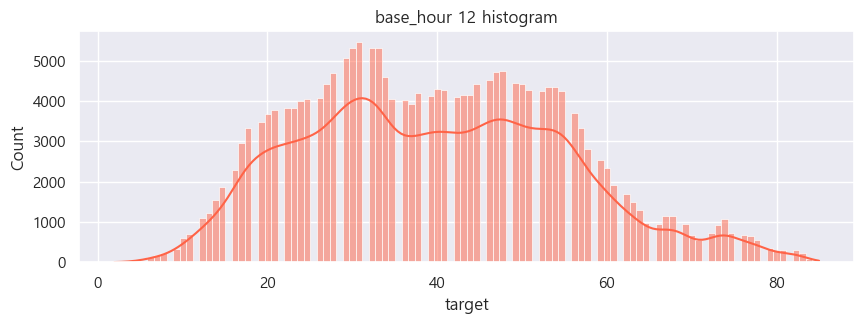

23 데이터 갯수 : 184229
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


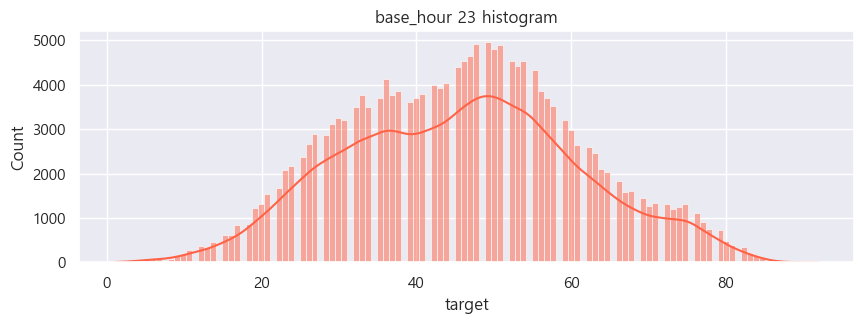

14 데이터 갯수 : 214182
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


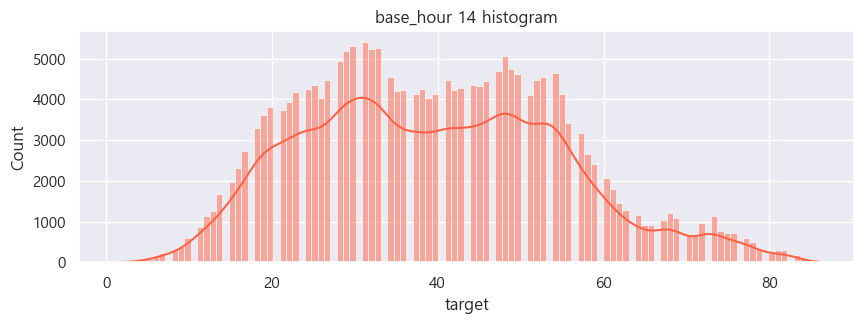

6 데이터 갯수 : 189418
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


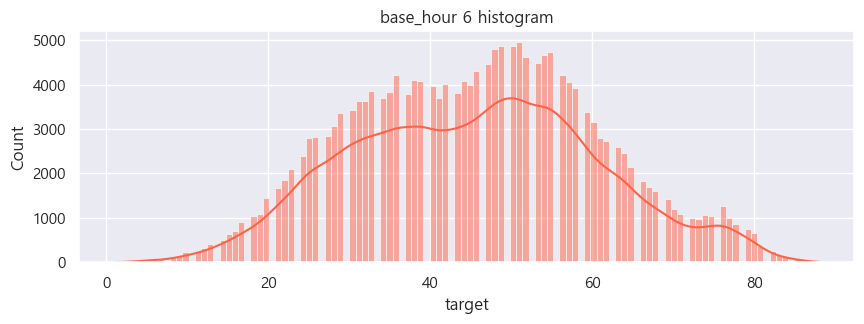

9 데이터 갯수 : 205327
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


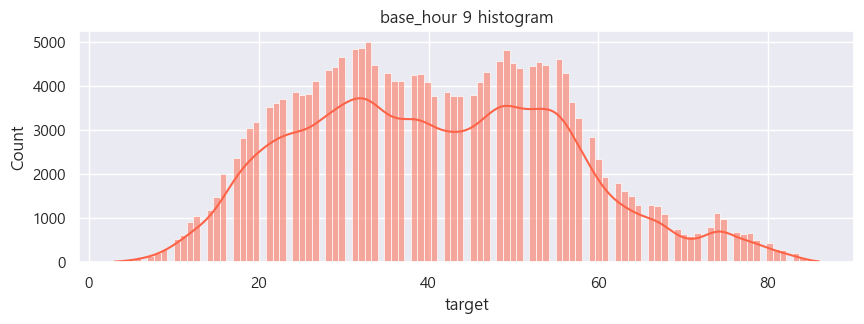

19 데이터 갯수 : 209870
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


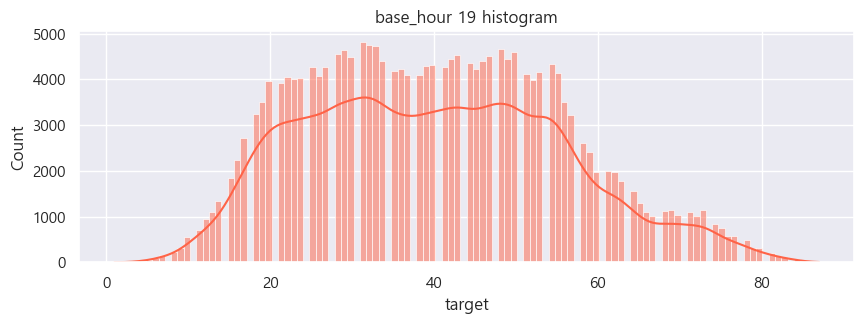

1 데이터 갯수 : 182353
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


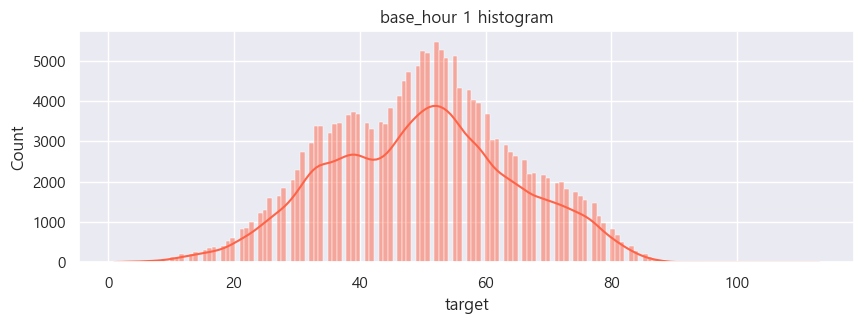

4 데이터 갯수 : 165284
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


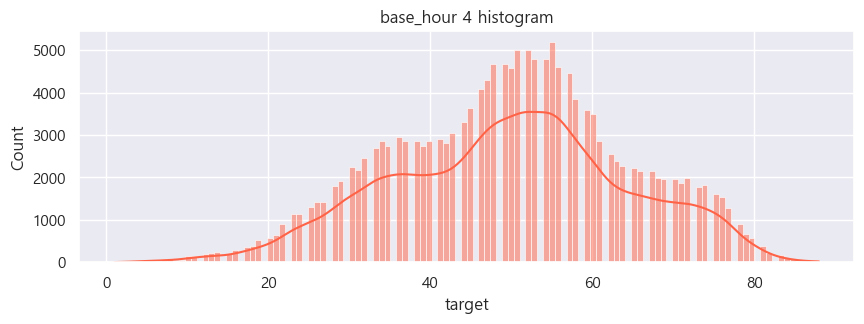

20 데이터 갯수 : 205059
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


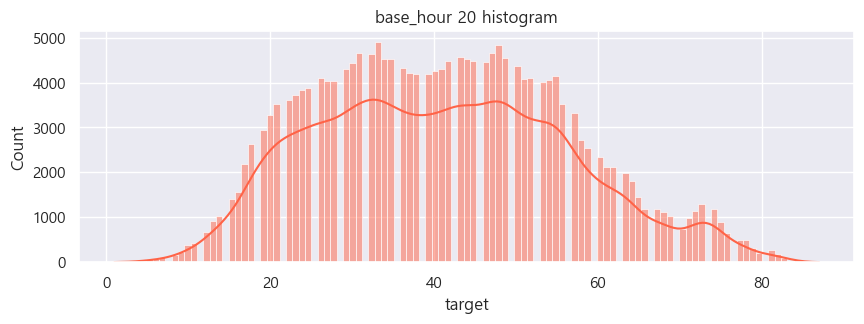

18 데이터 갯수 : 207500
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


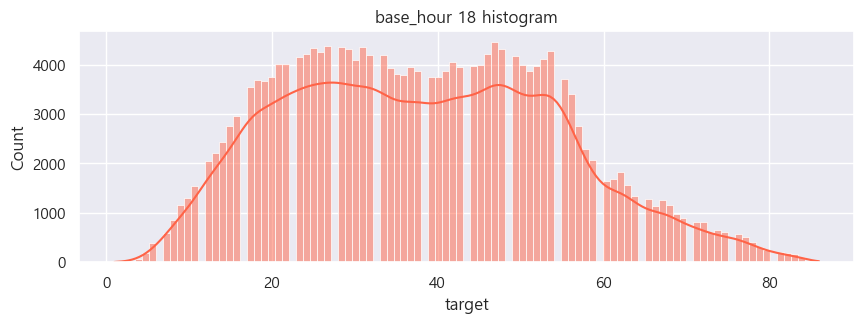

3 데이터 갯수 : 155938
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


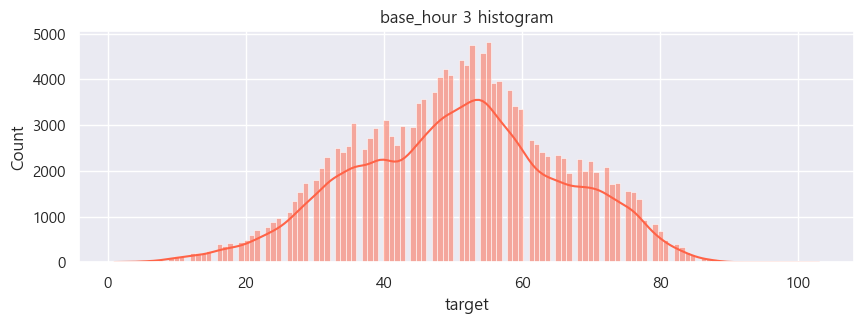

5 데이터 갯수 : 181128
base_hour의 최대값 : 23
base_hour의 최소값 : 0
base_hour의 평균값 : 11.928196252161941
base_hour의 중앙값 : 12.0


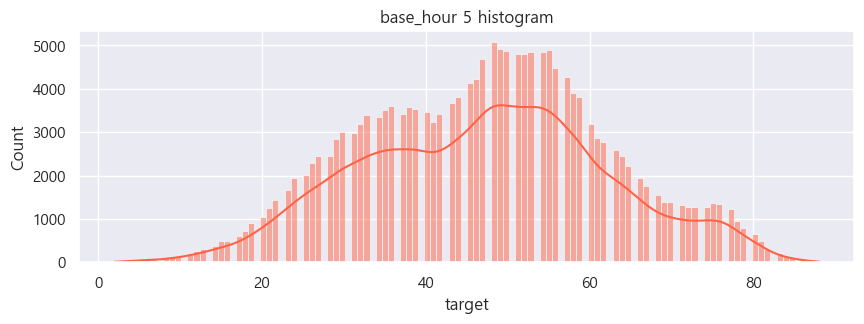

In [23]:
value_hist(train, 'base_hour')

0    4694812
1       6405
Name: road_in_use, dtype: int64


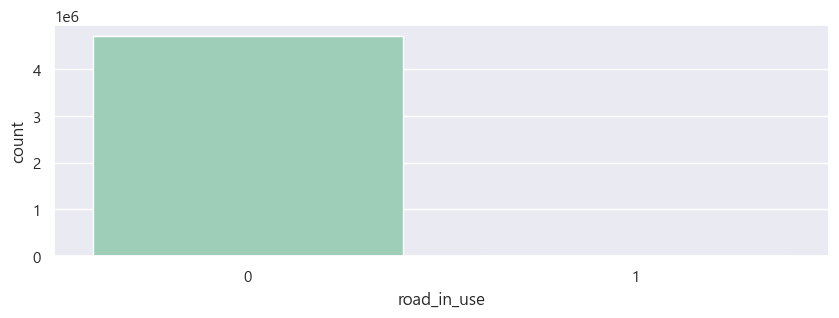

0 데이터 갯수 : 4694812
road_in_use의 최대값 : 1
road_in_use의 최소값 : 0
road_in_use의 평균값 : 0.0013624131793958884
road_in_use의 중앙값 : 0.0


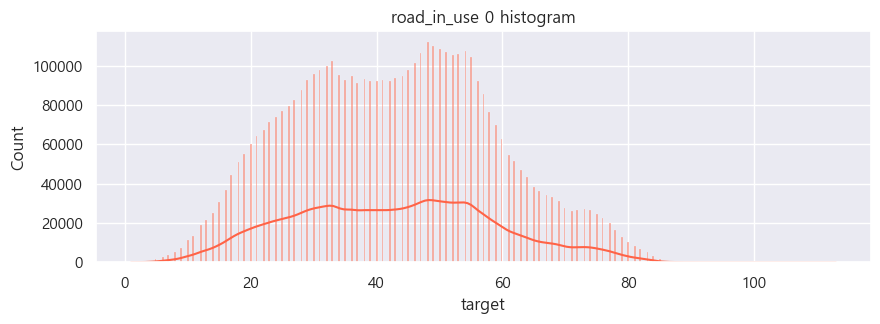

1 데이터 갯수 : 6405
road_in_use의 최대값 : 1
road_in_use의 최소값 : 0
road_in_use의 평균값 : 0.0013624131793958884
road_in_use의 중앙값 : 0.0


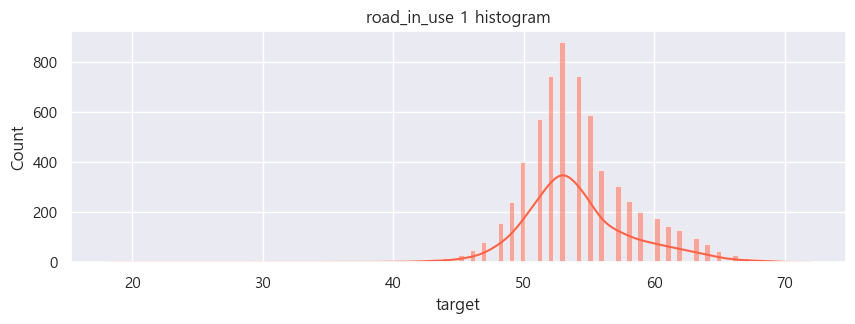

In [26]:
value_hist(train, 'road_in_use')

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64


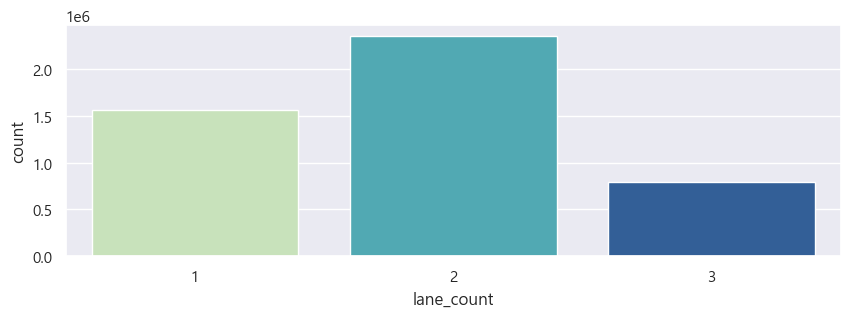

1 데이터 갯수 : 1558531
lane_count의 최대값 : 3
lane_count의 최소값 : 1
lane_count의 평균값 : 1.8366514457852083
lane_count의 중앙값 : 2.0


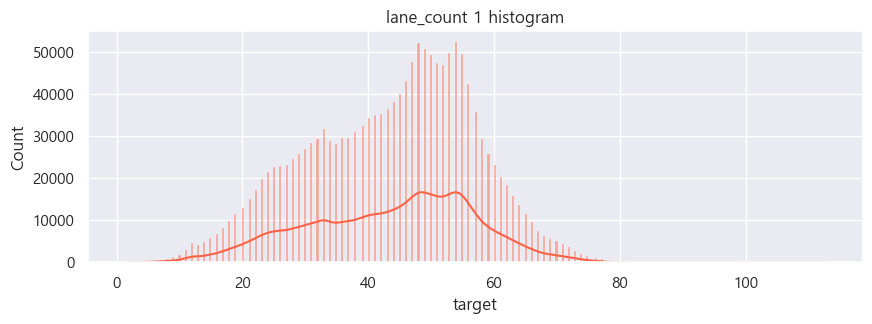

2 데이터 갯수 : 2352092
lane_count의 최대값 : 3
lane_count의 최소값 : 1
lane_count의 평균값 : 1.8366514457852083
lane_count의 중앙값 : 2.0


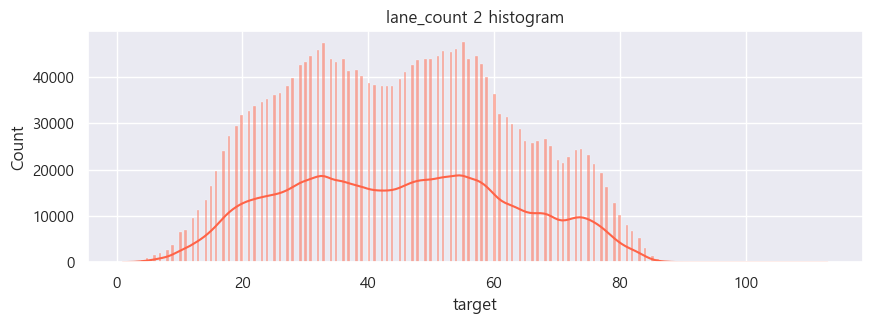

3 데이터 갯수 : 790594
lane_count의 최대값 : 3
lane_count의 최소값 : 1
lane_count의 평균값 : 1.8366514457852083
lane_count의 중앙값 : 2.0


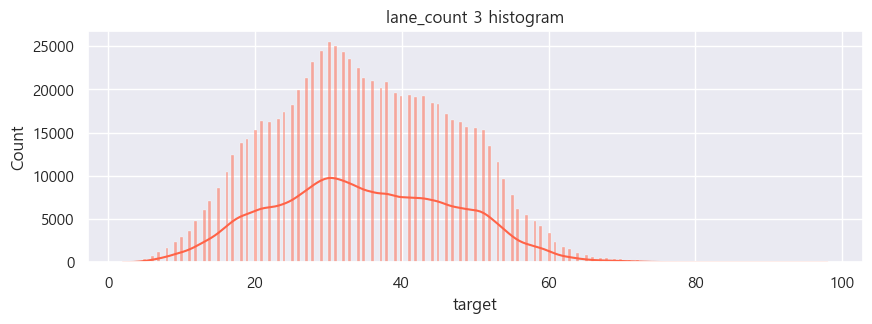

In [27]:
value_hist(train, 'lane_count')

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64


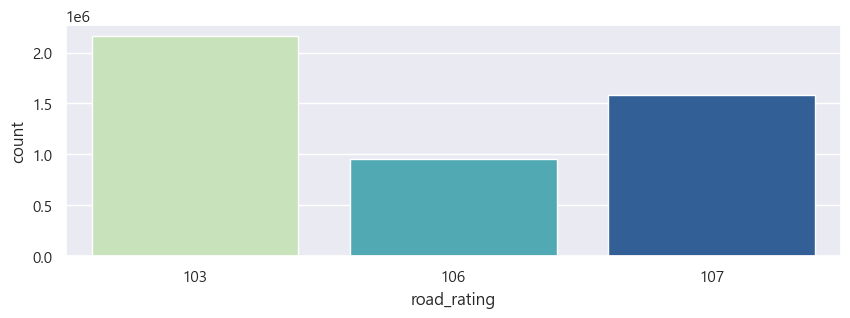

106 데이터 갯수 : 959492
road_rating의 최대값 : 107
road_rating의 최소값 : 103
road_rating의 평균값 : 104.9584996821036
road_rating의 중앙값 : 106.0


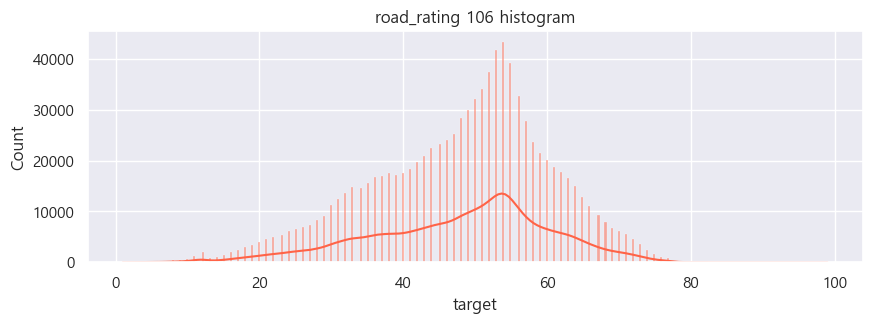

103 데이터 갯수 : 2159511
road_rating의 최대값 : 107
road_rating의 최소값 : 103
road_rating의 평균값 : 104.9584996821036
road_rating의 중앙값 : 106.0


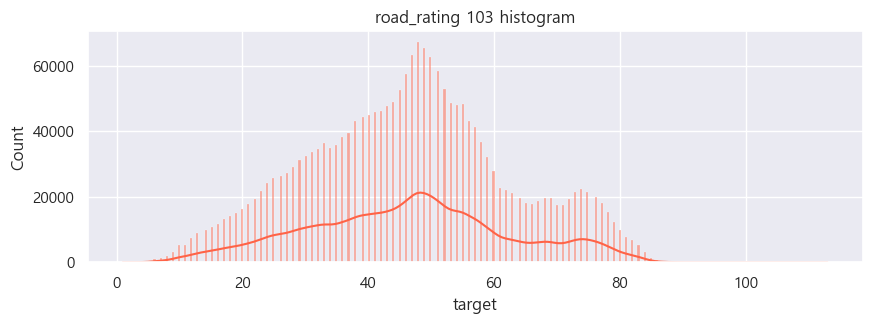

107 데이터 갯수 : 1582214
road_rating의 최대값 : 107
road_rating의 최소값 : 103
road_rating의 평균값 : 104.9584996821036
road_rating의 중앙값 : 106.0


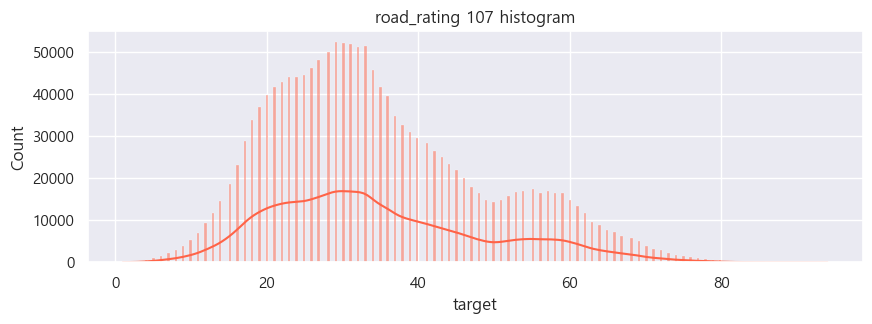

In [28]:
value_hist(train, 'road_rating')

0    4698978
1       2239
Name: multi_linked, dtype: int64


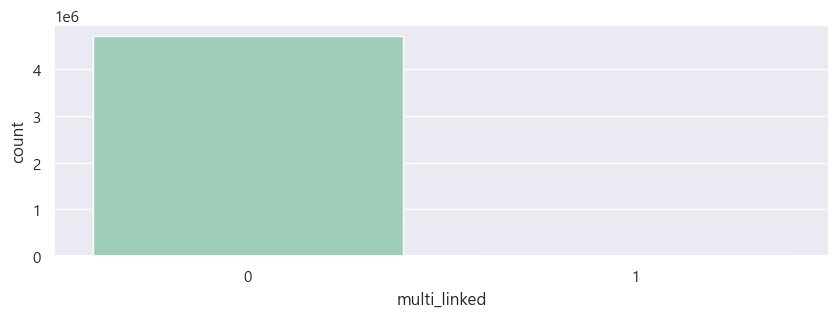

0 데이터 갯수 : 4698978
multi_linked의 최대값 : 1
multi_linked의 최소값 : 0
multi_linked의 평균값 : 0.00047625965787156813
multi_linked의 중앙값 : 0.0


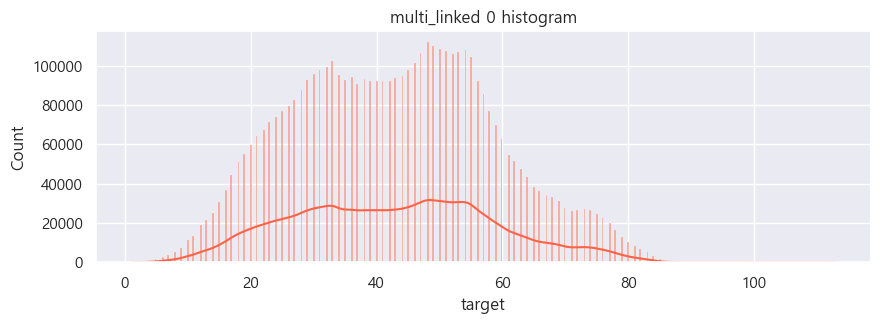

1 데이터 갯수 : 2239
multi_linked의 최대값 : 1
multi_linked의 최소값 : 0
multi_linked의 평균값 : 0.00047625965787156813
multi_linked의 중앙값 : 0.0


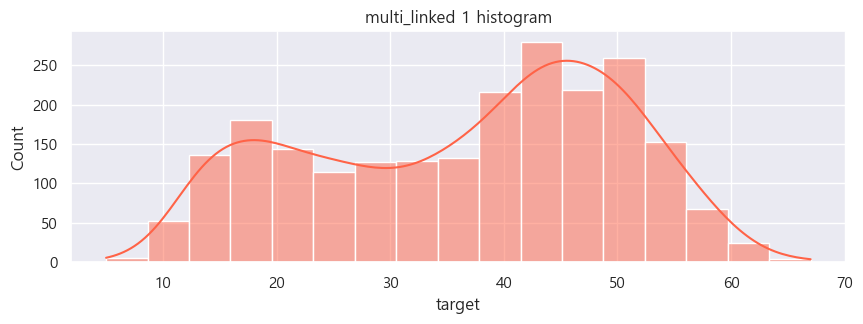

In [29]:
value_hist(train, 'multi_linked')

0      4689075
103      12142
Name: connect_code, dtype: int64


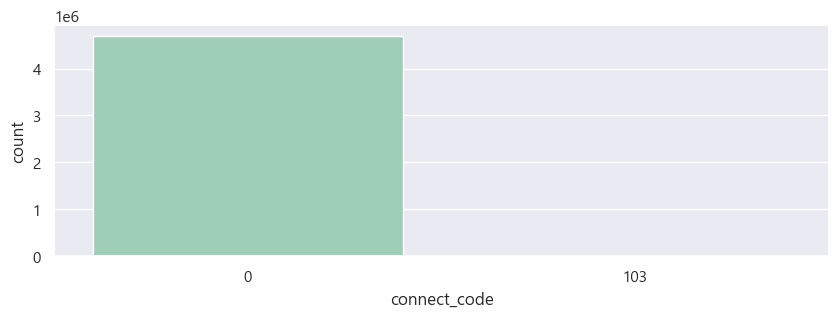

0 데이터 갯수 : 4689075
connect_code의 최대값 : 103
connect_code의 최소값 : 0
connect_code의 평균값 : 0.2660217556432728
connect_code의 중앙값 : 0.0


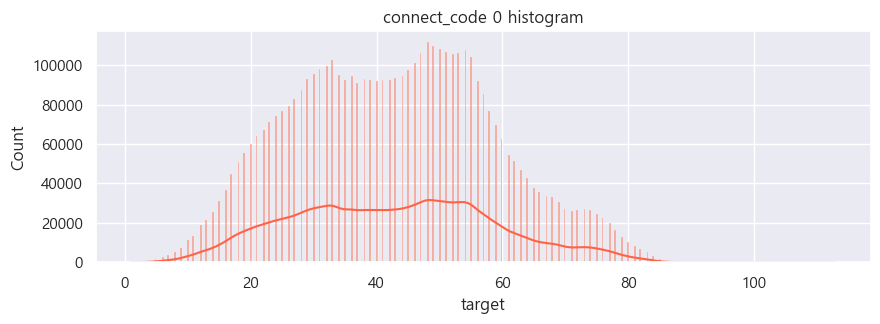

103 데이터 갯수 : 12142
connect_code의 최대값 : 103
connect_code의 최소값 : 0
connect_code의 평균값 : 0.2660217556432728
connect_code의 중앙값 : 0.0


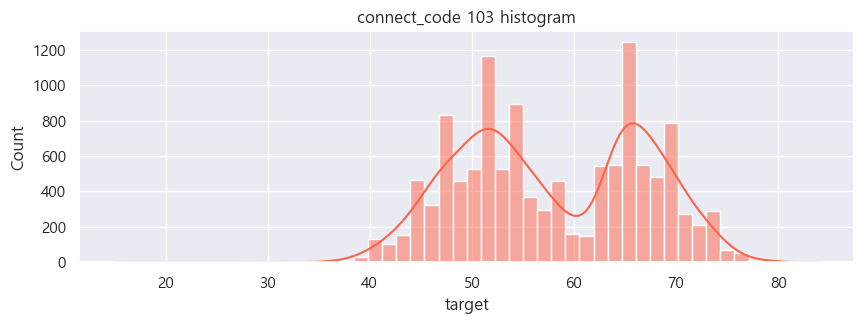

In [30]:
value_hist(train, 'connect_code')

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64


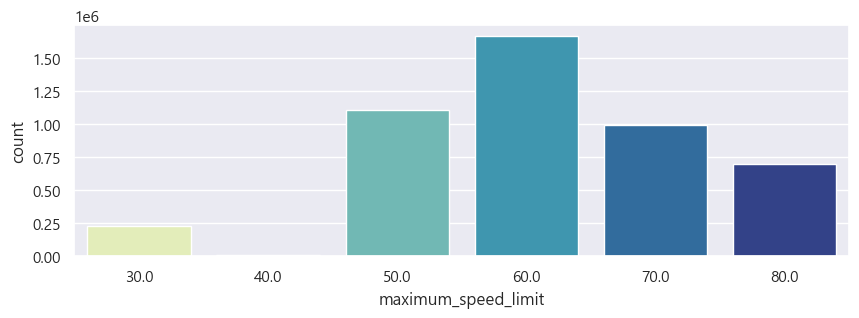

60.0 데이터 갯수 : 1665573
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


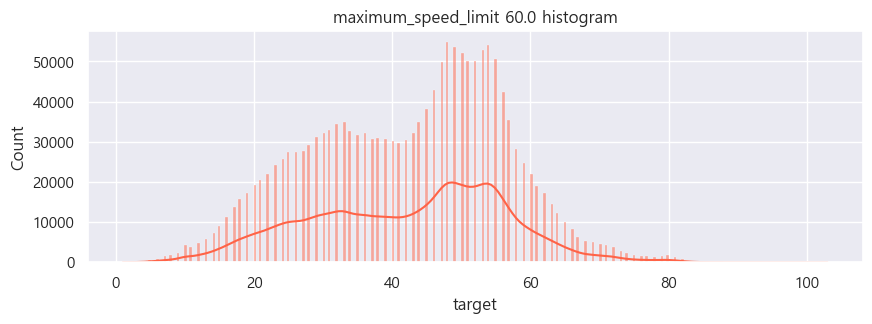

80.0 데이터 갯수 : 700334
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


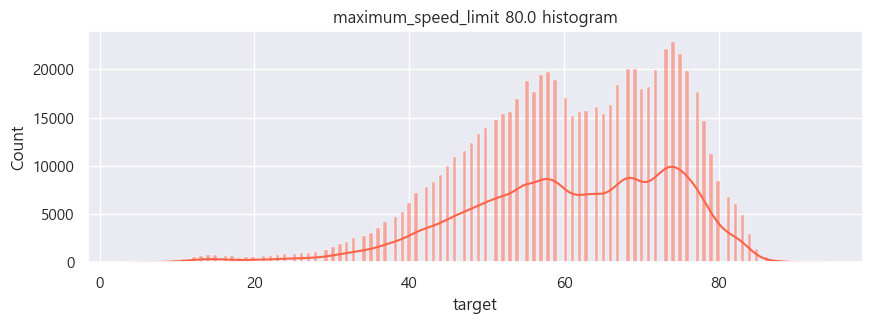

50.0 데이터 갯수 : 1103682
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


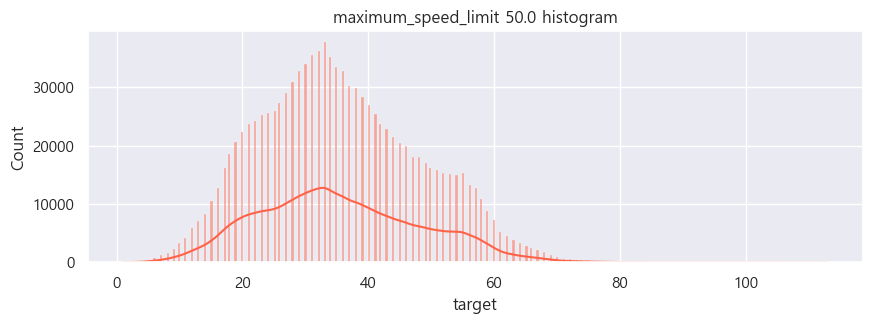

70.0 데이터 갯수 : 995077
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


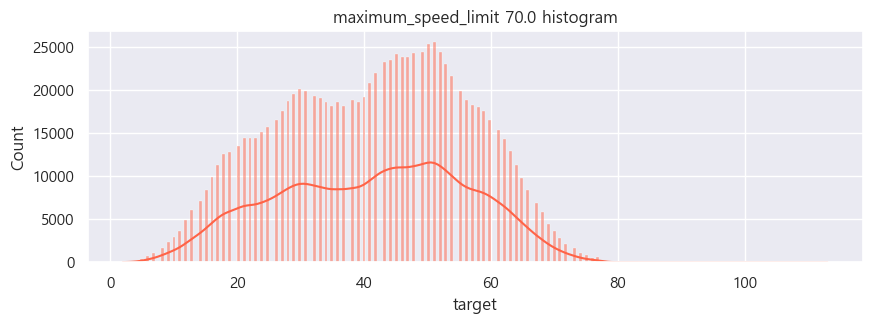

30.0 데이터 갯수 : 229761
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


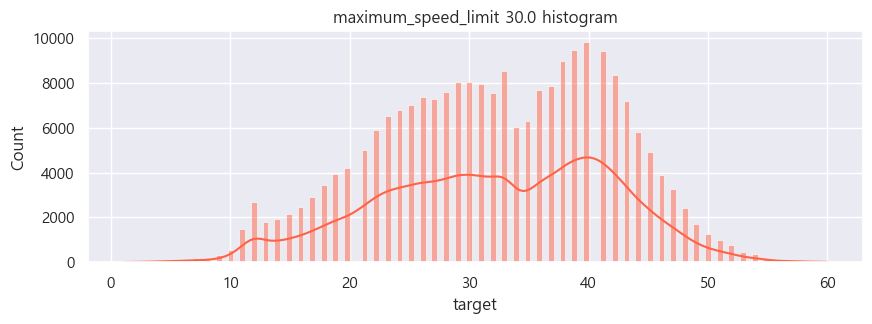

40.0 데이터 갯수 : 6790
maximum_speed_limit의 최대값 : 80.0
maximum_speed_limit의 최소값 : 30.0
maximum_speed_limit의 평균값 : 61.25329249851687
maximum_speed_limit의 중앙값 : 60.0


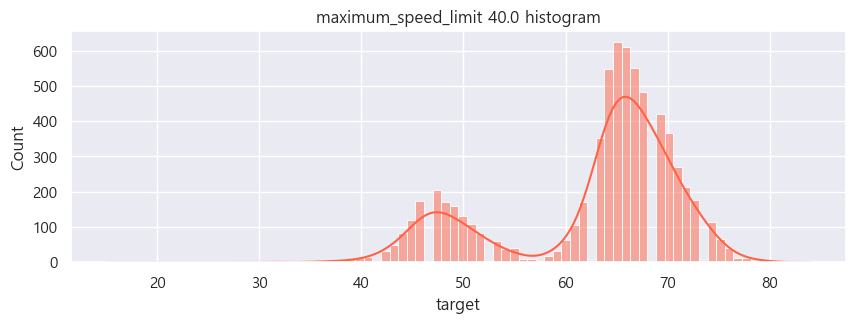

In [31]:
value_hist(train, 'maximum_speed_limit')

0    3737117
3     964100
Name: road_type, dtype: int64


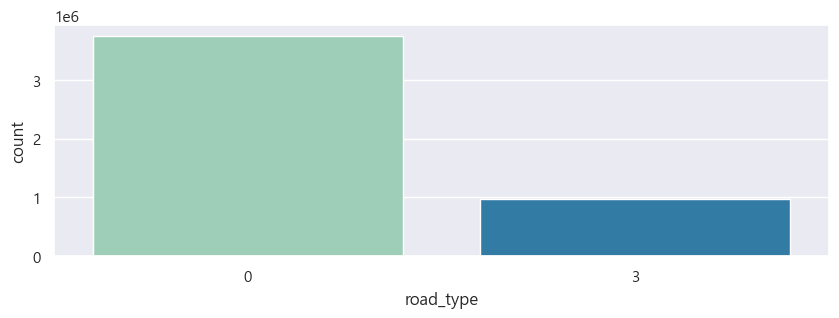

3 데이터 갯수 : 964100
road_type의 최대값 : 3
road_type의 최소값 : 0
road_type의 평균값 : 0.6152236750611597
road_type의 중앙값 : 0.0


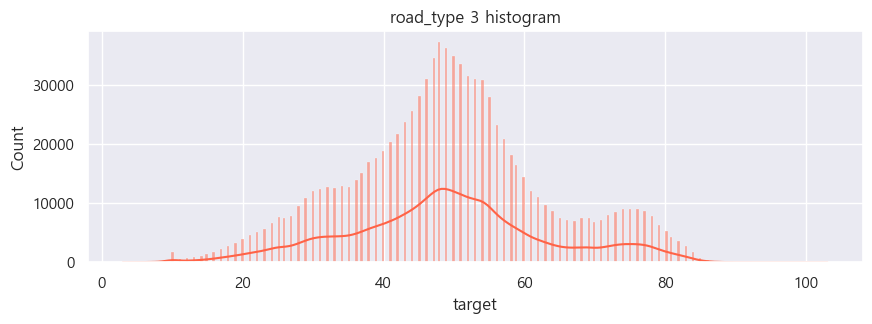

0 데이터 갯수 : 3737117
road_type의 최대값 : 3
road_type의 최소값 : 0
road_type의 평균값 : 0.6152236750611597
road_type의 중앙값 : 0.0


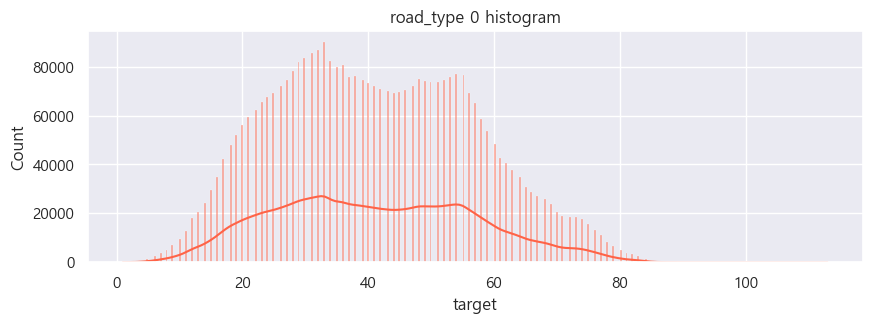

In [32]:
value_hist(train, 'road_type')

0    4239701
1     461516
Name: start_turn_restricted, dtype: int64


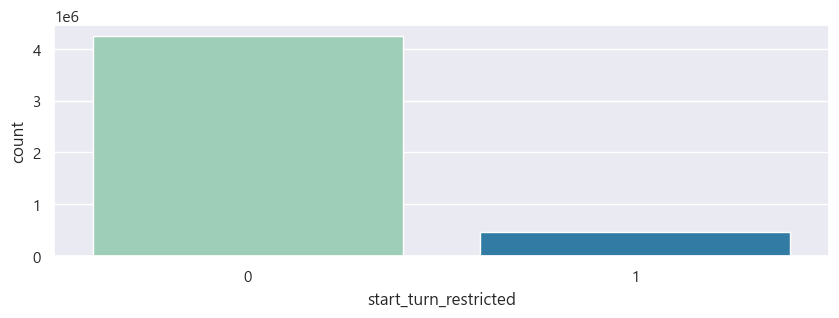

0 데이터 갯수 : 4239701
start_turn_restricted의 최대값 : 1
start_turn_restricted의 최소값 : 0
start_turn_restricted의 평균값 : 0.09816947398939466
start_turn_restricted의 중앙값 : 0.0


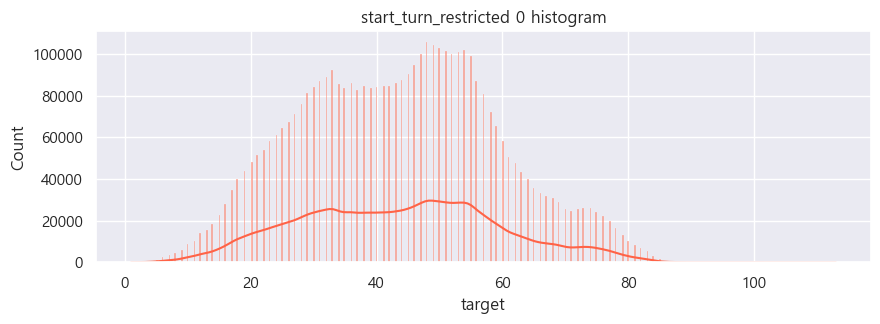

1 데이터 갯수 : 461516
start_turn_restricted의 최대값 : 1
start_turn_restricted의 최소값 : 0
start_turn_restricted의 평균값 : 0.09816947398939466
start_turn_restricted의 중앙값 : 0.0


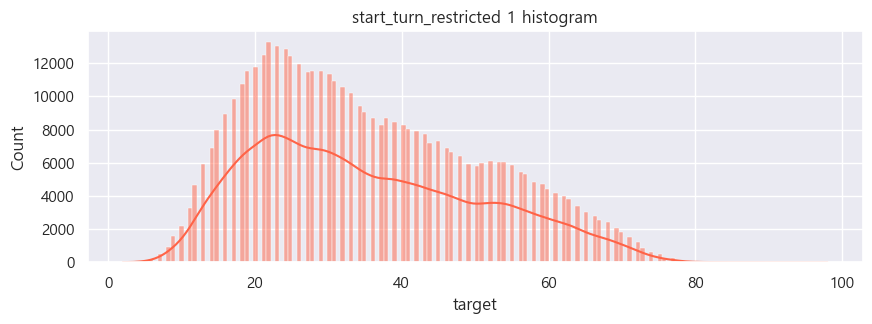

In [33]:
value_hist(train, 'start_turn_restricted')

0    4239599
1     461618
Name: end_turn_restricted, dtype: int64


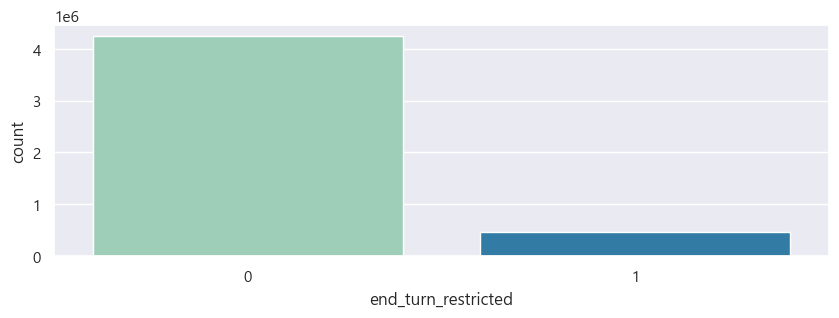

0 데이터 갯수 : 4239599
end_turn_restricted의 최대값 : 1
end_turn_restricted의 최소값 : 0
end_turn_restricted의 평균값 : 0.09819117049904312
end_turn_restricted의 중앙값 : 0.0


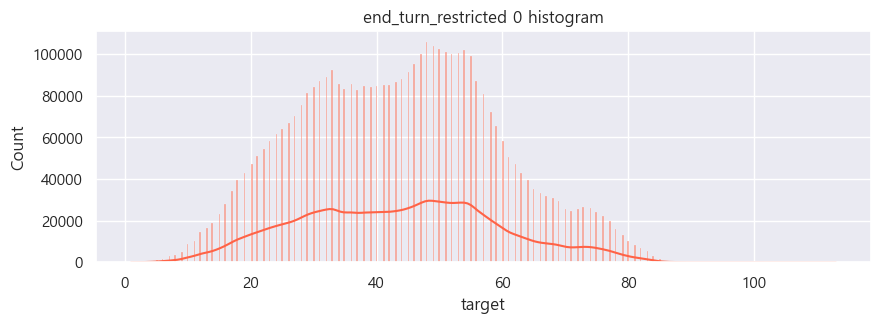

1 데이터 갯수 : 461618
end_turn_restricted의 최대값 : 1
end_turn_restricted의 최소값 : 0
end_turn_restricted의 평균값 : 0.09819117049904312
end_turn_restricted의 중앙값 : 0.0


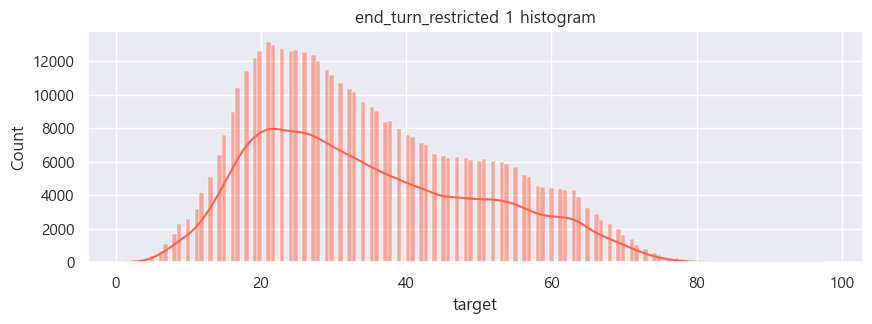

In [34]:
value_hist(train, 'end_turn_restricted')